<a href="https://colab.research.google.com/github/JuliaFavaro/Computing-Methods/blob/master/AutoEncoder_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create an autoencoder compressing ring distributed data


Use Keras docs as needed https://keras.io/api/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from keras.layers import Dense, Input, Dropout
from keras.models import Model
import tensorflow as tf




Generate some data

In [2]:
from math import *
# Fixing random state for reproducibility
np.random.seed(123)


N=10000
phi = 1.0 * np.random.uniform(0,2.*pi,N)
r = 1.0 * np.random.uniform(1,1.05,N)
x1= r*np.cos(phi)
x2= r*np.sin(phi)


print(x1[:10])
print(x2[:10])
X=np.stack((x1,x2),axis=1)



[-0.3409813  -0.23457664  0.15090313 -0.96590479 -0.19233162 -0.89053054
  1.02633836 -0.41715061 -1.04068864 -0.79267206]
[-0.97526683  1.01524162  1.03018916 -0.32268711 -0.99027508  0.46717571
 -0.12465297 -0.96115582  0.12528325  0.63818374]


Now let's look  at the data we generated, does it look like you expect?


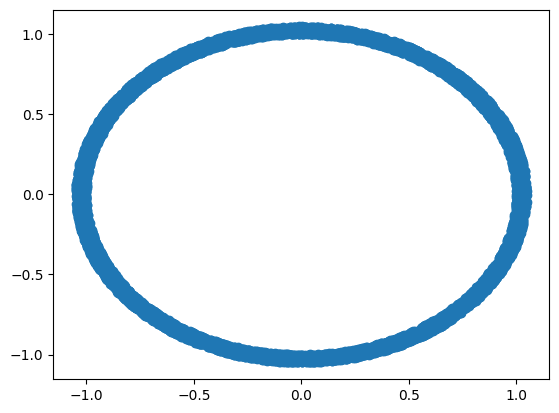

In [3]:
plt.scatter(X[:, 0], X[:, 1])


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,503 (21.50 KB)

 Trainable params: 5,503 (21.50 KB)

 Non-trainable params: 0 (0.00 B)

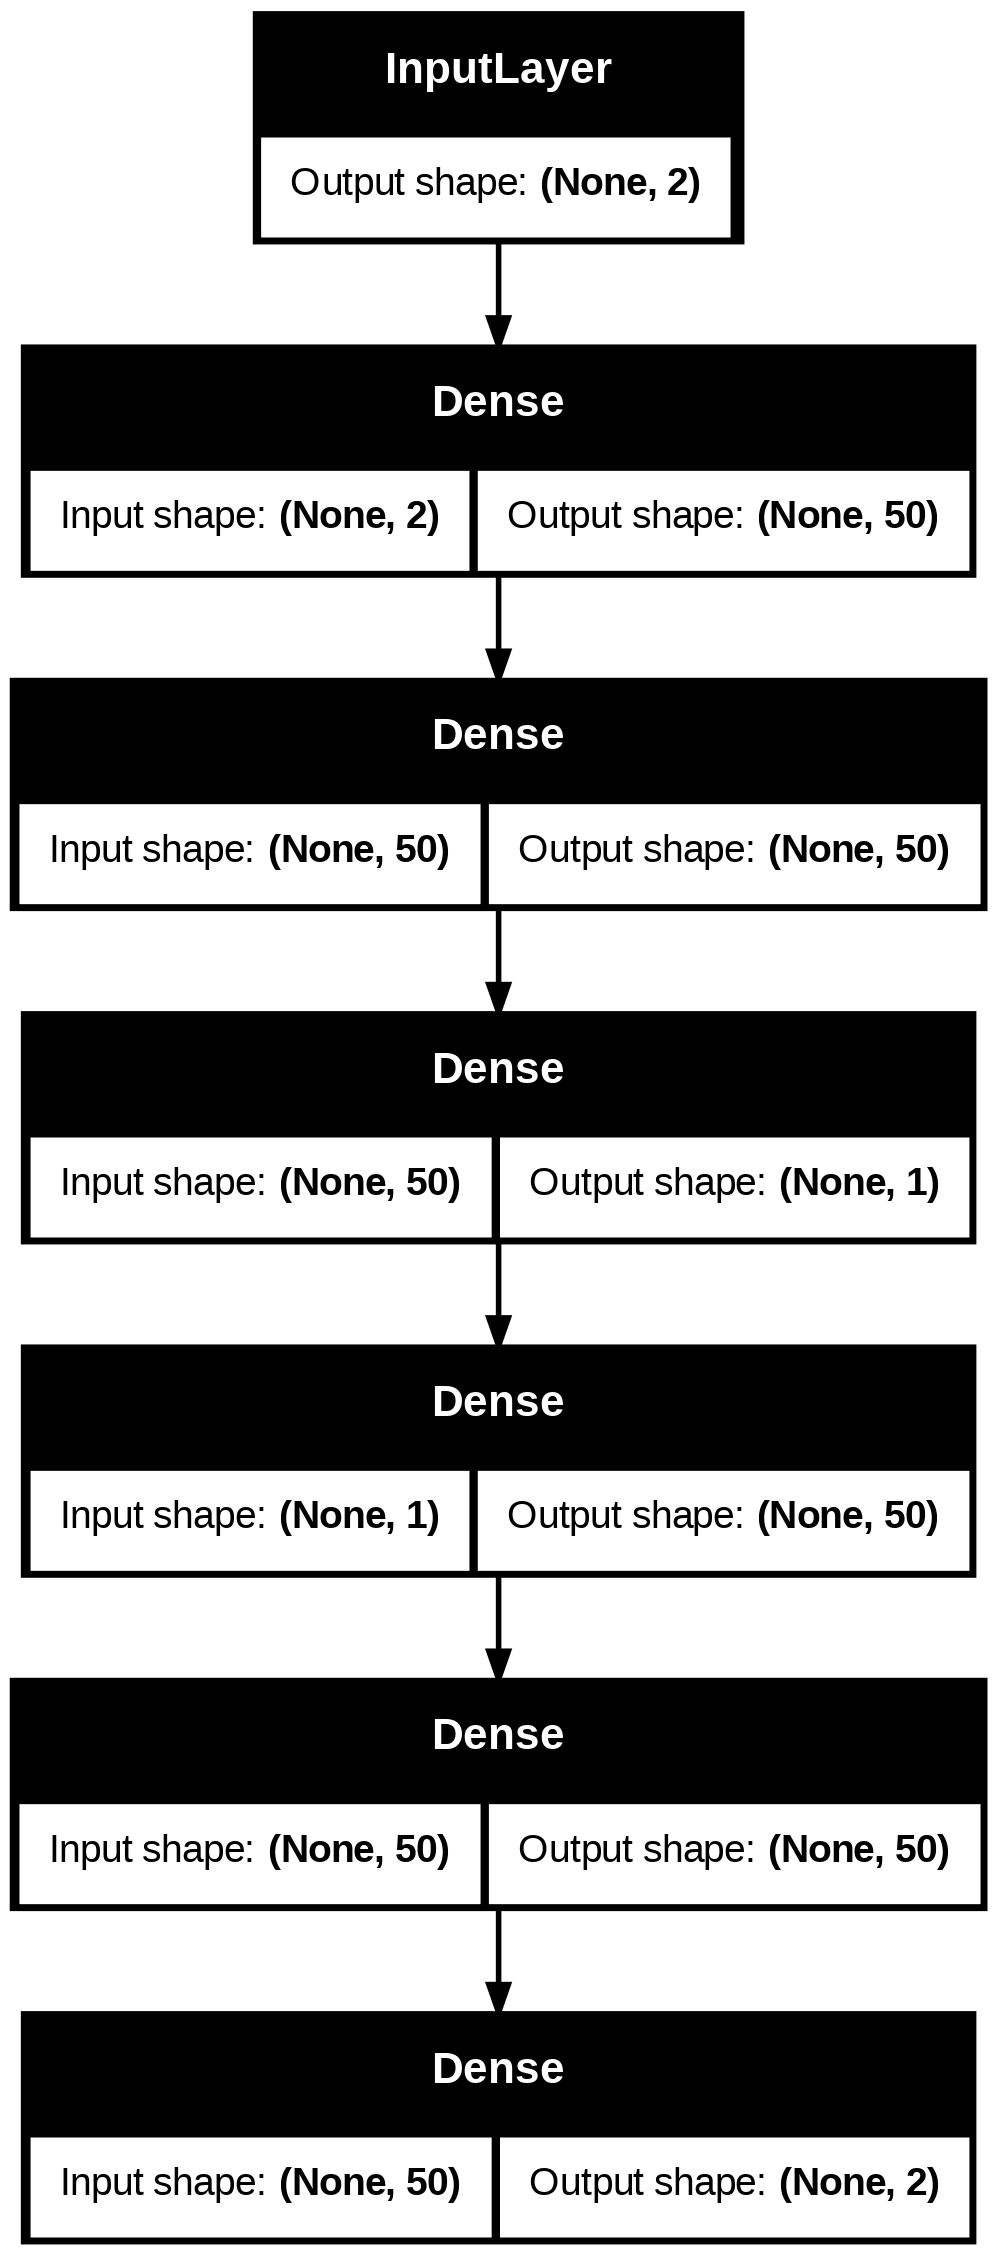

In [4]:

inputs=Input(shape=(2, )) #what is the shape that our input data has?

#create a encoding / decoding architecture with last layer having same dimensionality as the input
hidden=Dense(50, activation='relu')(inputs)
hidden=Dense(50, activation='relu')(hidden)

code1=Dense(1, activation='sigmoid')(hidden) #let's compress to a single variable

hidden=Dense(50, activation='relu')(code1)
hidden=Dense(50, activation='relu')(hidden)

outputs = Dense(2 , activation='linear')(hidden) #FILL THE DOTS# what is the size needed here ?
model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='MSE', optimizer='adam')
model.summary()

tf.keras.utils.plot_model(model, "model.png",show_shapes=True)


Split the dataset in training+validation and test, then fit




In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

#FILL THE DOTS below: what is our target?
history=model.fit(X, X ,validation_split=0.5,epochs=500,verbose=1,
                 callbacks = [
                EarlyStopping(monitor='val_loss', patience=20, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=10, verbose=1)
                ]
)

#questa è la LOSS del mio MSE
#L'errore che commetto su questo oggetto (il mio anello è la radice del learning rate)


Epoch 1/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.4586 - val_loss: 0.2723 - learning_rate: 0.0010
Epoch 2/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2508 - val_loss: 0.2082 - learning_rate: 0.0010
Epoch 3/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1741 - val_loss: 0.1290 - learning_rate: 0.0010
Epoch 4/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1067 - val_loss: 0.0979 - learning_rate: 0.0010
Epoch 5/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0867 - val_loss: 0.0728 - learning_rate: 0.0010
Epoch 6/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0632 - val_loss: 0.0596 - learning_rate: 0.0010
Epoch 7/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0496 - val_loss: 0.0466 - learning_rate: 0.0010
Epoch 8/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0386 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 9/500
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0345 - val_loss: 0.0331 - learning_rate: 0.0010


In the history object a history.history dictionary contains the validation and training loss vs epoch, let's try to plot them and compare to evaluate the training

dict_keys(['loss', 'val_loss', 'learning_rate'])
[0.3767205476760864, 0.23705580830574036, 0.15371878445148468, 0.10501479357481003, 0.07921714335680008, 0.061784856021404266, 0.050394512712955475, 0.039268575608730316, 0.033798929303884506, 0.02818329446017742, 0.02161695621907711, 0.022678900510072708, 0.018493615090847015, 0.017168696969747543, 0.015330453403294086, 0.012255159206688404, 0.01246807910501957, 0.011833559721708298, 0.01004751306027174, 0.010139206424355507, 0.0077648344449698925, 0.010420683771371841, 0.008118716068565845, 0.009839040227234364, 0.010410543531179428, 0.006540210917592049, 0.008900855667889118, 0.006665063556283712, 0.010298904031515121, 0.01401288341730833, 0.008625153452157974, 0.010590760037302971, 0.007420115638524294, 0.007208412047475576, 0.007570027839392424, 0.007521436084061861, 0.006290038116276264, 0.005469234194606543, 0.005689753219485283, 0.004402235150337219, 0.004228029400110245, 0.0044743940234184265, 0.005629953928291798, 0.00428326521

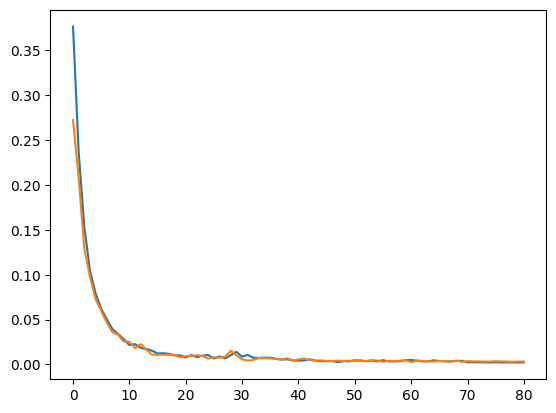

In [7]:
print(history.history.keys())
print(history.history['loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#FILL HERE#  use plt.plot() and plt.show() to make a plot with training vs validation loss as function of the epoch
#...
#...



Now let's try to evaluate our model on the xx1,xx2 points we created earlier)

In [9]:

#let's separate the encoder from the decoder creating two separate models from the one above
#utilizzo gli stessi layer di prima, otterrò un nuovo modello già allenato

encoder = Model(inputs=inputs, outputs=code1)
decoder = Model(inputs=code1 , outputs=outputs) #FILL THE DOTS
encoder.summary()
decoder.summary()



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │             150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,751 (10.75 KB)

 Trainable params: 2,751 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ keras_tensor_3CLONE (InputLayer)     │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,752 (10.75 KB)

 Trainable params: 2,752 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[-0.02557584  1.0224754 ]
 [ 1.0141051  -0.02730913]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[0.38124755]
 [0.85431397]
 [0.4862443 ]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


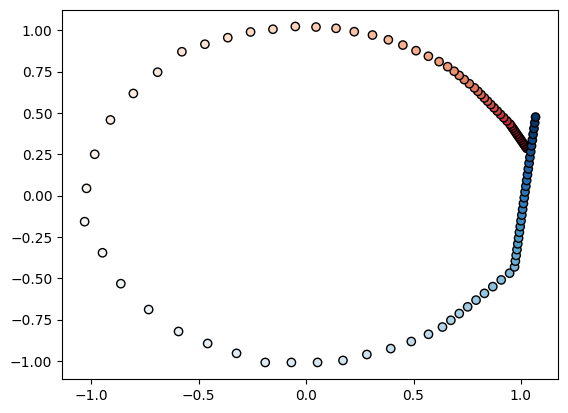

TypeError: 'builtin_function_or_method' object is not subscriptable

In [12]:
#let's see how much the AE  approximates given two examples
print(model.predict(np.array(([0.0,1],[1,0]))))

#and let's see what it would encode too
print(encoder.predict(np.array(([0.0,1],[1,0],[-1,0]))))

#let's now generate new samples by producing random states in the
latent=np.linspace(0,1,100)
deco=decoder.predict(latent)
plt.scatter(deco[:, 0], deco[:, 1], c=latent, cmap=plt.cm.RdBu, edgecolors='k')
plt.show()

x1,xx2=np.meshgrid(np.arange[-1,1,0.01], np.arange(-1,1,0.01), axis=-1)
test_set=np.stack((xx1,xx2),axis=1)
print(test_set)


In [ ]:
#quello che lui si scorda è ovviamente la variazione lungo il raggio in una struttura a ring
#non è tra i migliori generatori quindi